In [1]:
import ROOT as r
import numpy as np

Welcome to JupyROOT 6.12/07


In [2]:
# Create a 2-dimensional histogram.
h_2d = r.TH2F("h_2d", "My First 2-D Hist.", 
              50, 0, 10,  # num_bins_x, x_min, x_max
              100, 0, 100   # num_bins_y, y_min, y_max
             )

In [3]:
# Make some Gaussian (x,y) coordinates.
x_vals = np.random.normal(loc=5, scale=2, size=10000)  # loc is mean, scale is stdev.
y_vals = np.random.normal(loc=50, scale=15, size=10000)
# Fill the hist. 
for x,y in zip(x_vals, y_vals):
    h_2d.Fill(x, y, 1)

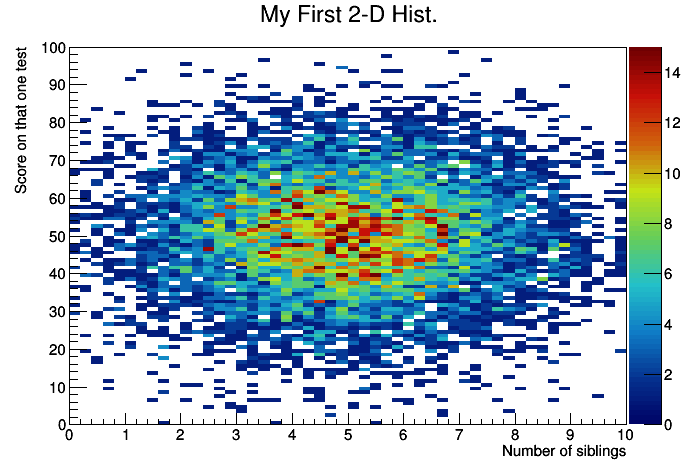

In [4]:
# Draw the 2D hist to a canvas. 
c1 = r.TCanvas()
h_2d.GetXaxis().SetTitle("Number of siblings")
h_2d.GetYaxis().SetTitle("Score on that one test")
h_2d.Draw("colz")

# Clean things up a bit.
r.gStyle.SetOptStat(0)  # Don't show the stats box.
h_2d.GetZaxis().SetRangeUser(0, 15)  # Restrict color bar to have limits: [0, 15].
r.gStyle.SetPalette(55)               # Change the color map.
# More color maps: https://root.cern.ch/doc/master/classTColor.html#C06
h_2d.SetContour(80)                   # Split the color bar into 80 colors (creates a nice gradient).

c1.Draw()

In [5]:
# Make another hist. 
h_1d = r.TH1F("h_1d", "A ski slope!", 100, -5, 15)
h_1d.GetXaxis().SetTitle("Distance (m)")
h_1d.GetYaxis().SetTitle("Height (Km)")

In [6]:
h_1d.FillRandom("gaus", 2000)
h_1d.FillRandom("expo", 10000)

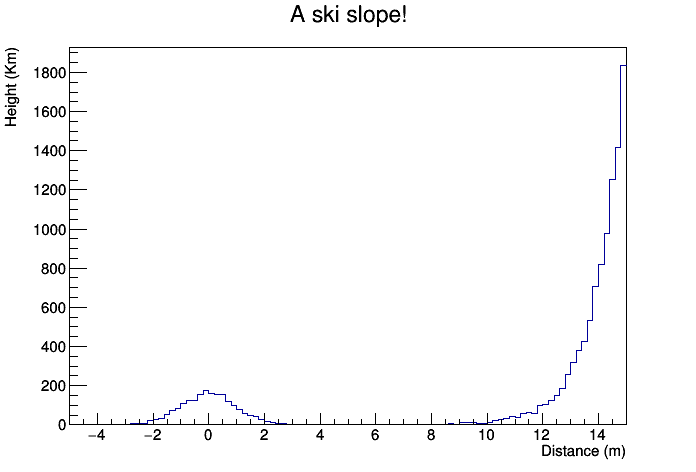

In [7]:
c2 = r.TCanvas()
h_1d.Draw("hist")
c2.Draw()

### Make a multi-page PDF.

In [8]:
# PDF path.
outfile_fullpath = "/home/rosedj1/combined_plots.pdf"

In [9]:
# Draw hists to clean canvas and save it to a PDF. 
c3 = r.TCanvas()
c3.Print(outfile_fullpath + "[")  # Opens the multi-page PDF. 
h_2d.Draw("colz1")                # Draw the first hist to the canvas.
c3.Print(outfile_fullpath)        # Saves the canvas to the growing PDF. 

h_1d.Draw("hist")
c3.Print(outfile_fullpath)        
c3.Print(outfile_fullpath + "]")  # Close the PDF.

Info in <TCanvas::Print>: pdf file /home/rosedj1/combined_plots.pdf has been created
Info in <TCanvas::Print>: Current canvas added to pdf file /home/rosedj1/combined_plots.pdf
Info in <TCanvas::Print>: Current canvas added to pdf file /home/rosedj1/combined_plots.pdf
Info in <TCanvas::Print>: pdf file /home/rosedj1/combined_plots.pdf has been closed
